In [1]:
import pandas as pd
import numpy as np
from scipy.stats import multivariate_normal
from tqdm import tqdm
import sys

sys.path.append('../')
import matplotlib.pyplot as plt
from models.hd_regression_model import HDRegressionModel
from models.ld_regression_model import LDRegressionModel
from sampling.least_squares_sampler import LeastSquaresSampler
from sampling.sghmc_sampling import SGHMCsampler
from metrics.covariance_metric_helpers import compute_empirical_cov

In [2]:
data = pd.read_csv('../data/synthetic_data.csv').to_numpy()
d = data.shape[1] - 1
n = data.shape[0]
y = data[:n,d]
X = data[:n,:d]
d_dash = d

In [3]:
# create embedding function
def phi(x):
	return x

In [4]:
var_observation = 1
var_prior = 1
A = np.linalg.inv(np.diag(np.full(d_dash, var_prior)))
model = HDRegressionModel(X, y, np.full(n, var_observation), A, phi)
ld_model = LDRegressionModel(X, y, np.full(len(X), var_observation), A, phi)

In [5]:
ls_sampler = LeastSquaresSampler(model, 750, np.zeros(d_dash))

In [7]:
def flat(epoch, n_epochs, lrate_max, **kwargs):
	return lrate_max

def steps(epoch, n_epochs, lrate_max, **kwargs):
	n_steps = kwargs["n_steps"]
	delay = n_epochs / n_steps
	k = np.floor(epoch / delay)
	return lrate_max * np.exp(-k)

def stepped_lr(epoch, n_epochs, lrate_max, **kwargs):
	lr_decay = kwargs["lr_decay"]
	lr_step = kwargs["lr_step"]
	lr_min = kwargs["lr_min"]
	steps = np.floor_divide(epoch, lr_step)
	lr = lrate_max * np.power(lr_decay, steps)
	lr = np.maximum(lr, lr_min)
	return lr

In [8]:
N = 1
n_iters = 2000
samples = np.zeros((N, d_dash))
trueSamples = np.zeros((N, d_dash))
diffs = np.zeros((N, n_iters))
errors = np.zeros((N, n_iters))
for i in range(N):
	samples[i], (debug) = ls_sampler.sample(scheduler=flat, rate=1e-6, threshold=0, max_iters=n_iters, debug=True, debug_steps=100)
	diffs[i,:], errors[i,:], trueSamples[i] = debug[0], debug[1], debug[2]
	#samples[i], _ = ls_sampler.sample(rate=1e-5, threshold=0, max_iters=n_iters, debug=False, debug_steps=100, scheduler=flat)

Computing Epsilon...
Computing true sample
Computing regulariser...


  2%|▏         | 46/2000 [00:00<00:04, 457.71it/s]

INFO: iters = 0, norm_z = 0.0, diff = inf, rate = 1e-06
INFO: average gradient time = 0.0
INFO: average subsample time = 0.0, average Phi generation time = 0.0, average compute time = 0.0
INFO: iters = 0, norm_z = 0.0, norm_grad = 0.0, rate = 1e-06


  9%|▉         | 185/2000 [00:00<00:03, 454.52it/s]

INFO: iters = 100, norm_z = 0.06464004482682344, diff = 553.0048765959459, rate = 1e-06
INFO: average gradient time = 0.0021600985527038576
INFO: average subsample time = 0.0002401399612426758, average Phi generation time = 0.00021742582321166993, average compute time = 0.001699035167694092
INFO: iters = 100, norm_z = 0.06464004482682344, norm_grad = 553.0048765959459, rate = 1e-06


 14%|█▍        | 277/2000 [00:00<00:03, 451.27it/s]

INFO: iters = 200, norm_z = 0.11185517640575864, diff = 422.07281380235435, rate = 1e-06
INFO: average gradient time = 0.00433223009109497
INFO: average subsample time = 0.00047955513000488283, average Phi generation time = 0.00043293952941894534, average compute time = 0.003412675857543945
INFO: iters = 200, norm_z = 0.11185517640575864, norm_grad = 422.07281380235435, rate = 1e-06


 18%|█▊        | 369/2000 [00:00<00:03, 449.44it/s]

INFO: iters = 300, norm_z = 0.14619997955957034, diff = 363.44796783082893, rate = 1e-06
INFO: average gradient time = 0.006511218547821045
INFO: average subsample time = 0.0007184076309204101, average Phi generation time = 0.0006486177444458008, average compute time = 0.005133485794067383
INFO: iters = 300, norm_z = 0.14619997955957034, norm_grad = 363.44796783082893, rate = 1e-06


 23%|██▎       | 459/2000 [00:01<00:03, 448.52it/s]

INFO: iters = 400, norm_z = 0.17135710586576042, diff = 345.89412740504656, rate = 1e-06
INFO: average gradient time = 0.008692140579223634
INFO: average subsample time = 0.0009572076797485352, average Phi generation time = 0.0008696150779724121, average compute time = 0.0068511152267456054
INFO: iters = 400, norm_z = 0.17135710586576042, norm_grad = 345.89412740504656, rate = 1e-06


 27%|██▋       | 549/2000 [00:01<00:03, 410.18it/s]

INFO: iters = 500, norm_z = 0.18980175725974918, diff = 341.75799690958854, rate = 1e-06
INFO: average gradient time = 0.01130793333053589
INFO: average subsample time = 0.0011956286430358887, average Phi generation time = 0.001091916561126709, average compute time = 0.009002606868743896
INFO: iters = 500, norm_z = 0.18980175725974918, norm_grad = 341.75799690958854, rate = 1e-06


 34%|███▍      | 684/2000 [00:01<00:03, 433.69it/s]

INFO: iters = 600, norm_z = 0.20278985951916828, diff = 354.77810953418486, rate = 1e-06
INFO: average gradient time = 0.013503866195678711
INFO: average subsample time = 0.0014334821701049805, average Phi generation time = 0.0013116621971130372, average compute time = 0.010737464427947999
INFO: iters = 600, norm_z = 0.20278985951916828, norm_grad = 354.77810953418486, rate = 1e-06


 39%|███▊      | 773/2000 [00:01<00:02, 434.53it/s]

INFO: iters = 700, norm_z = 0.21308557809543813, diff = 370.24405188556653, rate = 1e-06
INFO: average gradient time = 0.015708892345428466
INFO: average subsample time = 0.001672067642211914, average Phi generation time = 0.0015291857719421386, average compute time = 0.012482993602752686
INFO: iters = 700, norm_z = 0.21308557809543813, norm_grad = 370.24405188556653, rate = 1e-06


 43%|████▎     | 864/2000 [00:01<00:02, 443.17it/s]

INFO: iters = 800, norm_z = 0.22064356611016708, diff = 353.2972915149245, rate = 1e-06
INFO: average gradient time = 0.017954254150390626
INFO: average subsample time = 0.001911029815673828, average Phi generation time = 0.0017464470863342285, average compute time = 0.014268581867218017
INFO: iters = 800, norm_z = 0.22064356611016708, norm_grad = 353.2972915149245, rate = 1e-06


 48%|████▊     | 956/2000 [00:02<00:02, 447.85it/s]

INFO: iters = 900, norm_z = 0.2260789406546508, diff = 359.94869973104915, rate = 1e-06
INFO: average gradient time = 0.020120220184326174
INFO: average subsample time = 0.002149062156677246, average Phi generation time = 0.0019620132446289064, average compute time = 0.015977451801300047
INFO: iters = 900, norm_z = 0.2260789406546508, norm_grad = 359.94869973104915, rate = 1e-06


 52%|█████▏    | 1046/2000 [00:02<00:02, 444.66it/s]

INFO: iters = 1000, norm_z = 0.23004482592536857, diff = 398.71902066069293, rate = 1e-06
INFO: average gradient time = 0.02231828689575195
INFO: average subsample time = 0.0023873615264892577, average Phi generation time = 0.002180190086364746, average compute time = 0.01771554470062256
INFO: iters = 1000, norm_z = 0.23004482592536857, norm_grad = 398.71902066069293, rate = 1e-06


 59%|█████▉    | 1184/2000 [00:02<00:01, 453.14it/s]

INFO: iters = 1100, norm_z = 0.23336718247824295, diff = 358.8872217095149, rate = 1e-06
INFO: average gradient time = 0.024480683803558348
INFO: average subsample time = 0.0026250696182250977, average Phi generation time = 0.0023992204666137694, average compute time = 0.019417660236358644
INFO: iters = 1100, norm_z = 0.23336718247824295, norm_grad = 358.8872217095149, rate = 1e-06


 64%|██████▍   | 1277/2000 [00:02<00:01, 452.96it/s]

INFO: iters = 1200, norm_z = 0.23565071442493002, diff = 390.4707616031645, rate = 1e-06
INFO: average gradient time = 0.02663451910018921
INFO: average subsample time = 0.0028629398345947268, average Phi generation time = 0.002612435817718506, average compute time = 0.0211168909072876
INFO: iters = 1200, norm_z = 0.23565071442493002, norm_grad = 390.4707616031645, rate = 1e-06


 68%|██████▊   | 1370/2000 [00:03<00:01, 456.05it/s]

INFO: iters = 1300, norm_z = 0.23770561304466106, diff = 357.7802350946145, rate = 1e-06
INFO: average gradient time = 0.028785552978515625
INFO: average subsample time = 0.003101036548614502, average Phi generation time = 0.0028266215324401853, average compute time = 0.022812170982360838
INFO: iters = 1300, norm_z = 0.23770561304466106, norm_grad = 357.7802350946145, rate = 1e-06


 73%|███████▎  | 1462/2000 [00:03<00:01, 456.60it/s]

INFO: iters = 1400, norm_z = 0.2390250780494367, diff = 362.62334893978704, rate = 1e-06
INFO: average gradient time = 0.030912413597106933
INFO: average subsample time = 0.0033392071723937987, average Phi generation time = 0.003040943145751953, average compute time = 0.02448302984237671
INFO: iters = 1400, norm_z = 0.2390250780494367, norm_grad = 362.62334893978704, rate = 1e-06


 78%|███████▊  | 1555/2000 [00:03<00:00, 458.04it/s]

INFO: iters = 1500, norm_z = 0.2398442831577839, diff = 394.1560789613219, rate = 1e-06
INFO: average gradient time = 0.03305076360702515
INFO: average subsample time = 0.0035770177841186524, average Phi generation time = 0.003255748748779297, average compute time = 0.0261651873588562
INFO: iters = 1500, norm_z = 0.2398442831577839, norm_grad = 394.1560789613219, rate = 1e-06


 82%|████████▏ | 1648/2000 [00:03<00:00, 457.90it/s]

INFO: iters = 1600, norm_z = 0.24035227729105657, diff = 359.0546668524632, rate = 1e-06
INFO: average gradient time = 0.03520208358764648
INFO: average subsample time = 0.0038146233558654786, average Phi generation time = 0.0034698152542114256, average compute time = 0.027861390113830566
INFO: iters = 1600, norm_z = 0.24035227729105657, norm_grad = 359.0546668524632, rate = 1e-06


 89%|████████▉ | 1788/2000 [00:04<00:00, 455.93it/s]

INFO: iters = 1700, norm_z = 0.24094259034182253, diff = 417.1129661158828, rate = 1e-06
INFO: average gradient time = 0.037360434532165525
INFO: average subsample time = 0.004052696228027344, average Phi generation time = 0.003683781623840332, average compute time = 0.02956425189971924
INFO: iters = 1700, norm_z = 0.24094259034182253, norm_grad = 417.1129661158828, rate = 1e-06


 94%|█████████▍| 1880/2000 [00:04<00:00, 452.19it/s]

INFO: iters = 1800, norm_z = 0.24138053170417598, diff = 403.62196709051534, rate = 1e-06
INFO: average gradient time = 0.03950188875198364
INFO: average subsample time = 0.004290592670440674, average Phi generation time = 0.003897428512573242, average compute time = 0.03125070333480835
INFO: iters = 1800, norm_z = 0.24138053170417598, norm_grad = 403.62196709051534, rate = 1e-06


 99%|█████████▊| 1972/2000 [00:04<00:00, 449.16it/s]

INFO: iters = 1900, norm_z = 0.24138748312303418, diff = 392.7262680920654, rate = 1e-06
INFO: average gradient time = 0.041677048206329344
INFO: average subsample time = 0.004528813362121582, average Phi generation time = 0.004113192558288574, average compute time = 0.0329683780670166
INFO: iters = 1900, norm_z = 0.24138748312303418, norm_grad = 392.7262680920654, rate = 1e-06


100%|██████████| 2000/2000 [00:04<00:00, 446.07it/s]


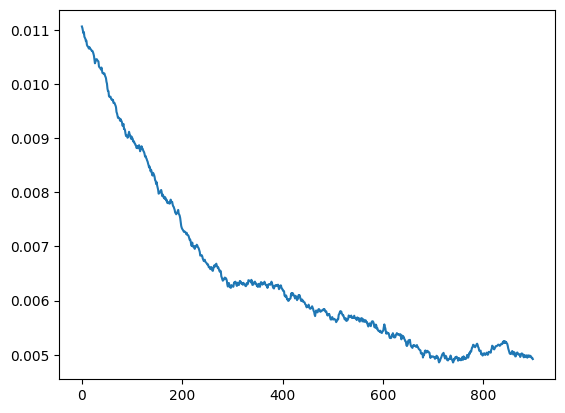

In [12]:
plt.plot(errors[0][1100:])

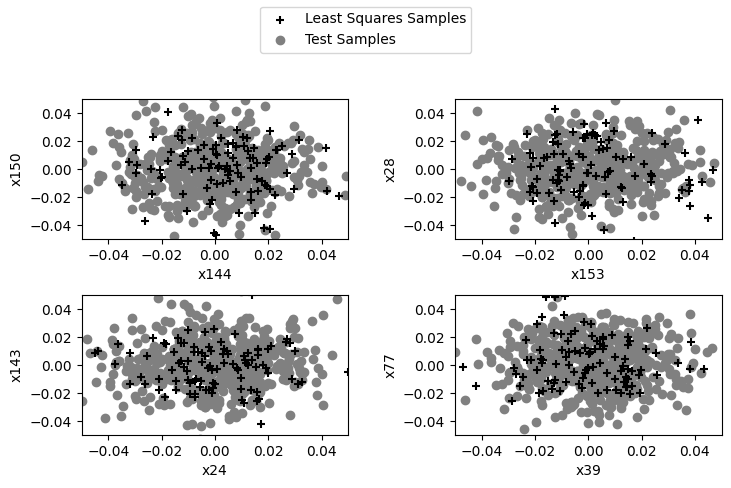

In [ ]:
test_samples = np.random.multivariate_normal(np.zeros(d_dash), ld_model.Hinv, size=500)
fig, ax = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        a = 1
        b = 1
        while a == b:    
            a = np.random.randint(0, d_dash)
            b = np.random.randint(0, d_dash)
            if a != b: 
                ax[i][j].scatter(samples[:,a], samples[:,b], color='Black', marker='+', label="Least Squares Samples")
                ax[i][j].scatter(test_samples[:,a], test_samples[:,b], c='Grey', zorder=-1, label="Test Samples")
                #ax[i][j].scatter(trueSamples[:,a], trueSamples[:,b], c='Orange', zorder=-1, label="Target Samples")
                ax[i][j].set_xlabel("x{}".format(a))
                ax[i][j].set_ylabel("x{}".format(b))
                ax[i][j].set_xlim(-0.05,0.05)
                ax[i][j].set_ylim(-0.05,0.05)
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.1,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)
fig.subplots_adjust(top=0.8)

In [6]:
sghmc_sampler = SGHMCsampler(model, 500, ld_model.mean, 300, ld_model.mean, Minv=np.diag(np.full(d, 1)), gamma=1e-4, epsilon=1e-4)

In [7]:
N = 10
sghmc_samples = np.zeros((N, d))
for i in range(N):
	sghmc_samples[i] = sghmc_sampler.sample()

100%|██████████| 300/300 [00:02<00:00, 143.37it/s]


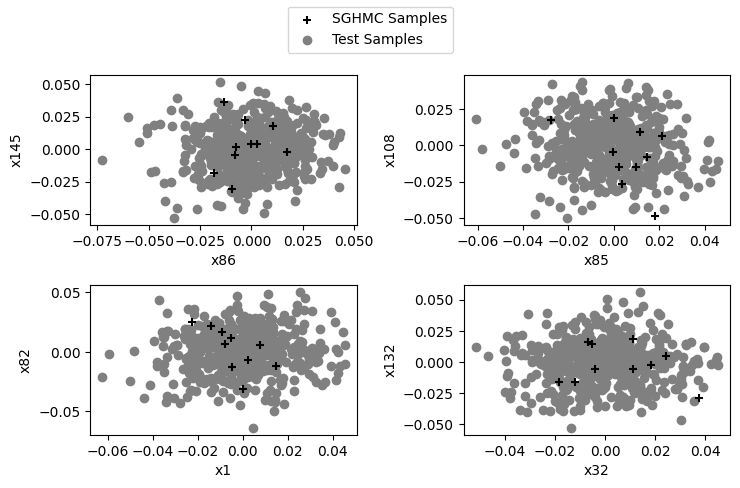

In [8]:
test_samples = np.random.multivariate_normal(np.zeros(d), ld_model.Hinv, size=500)
fig, ax = plt.subplots(2,2)
for i in range(2):
    for j in range(2):
        a = 1
        b = 1
        while a == b:    
            a = np.random.randint(0, d)
            b = np.random.randint(0, d)
            if a != b: 
                ax[i][j].scatter(sghmc_samples[:,a], sghmc_samples[:,b], color='Black', marker='+', label="SGHMC Samples")
                ax[i][j].scatter(test_samples[:,a], test_samples[:,b], c='Grey', zorder=-1, label="Test Samples")
                ax[i][j].set_xlabel("x{}".format(a))
                ax[i][j].set_ylabel("x{}".format(b))
                #ax[i][j].set_xlim(-0.05,0.05)
                #ax[i][j].set_ylim(-0.05,0.05)
handles, labels = ax[0][0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=1.1,
                    top=0.85,
                    wspace=0.4,
                    hspace=0.4)